# Assignment2 - Supervised Learning flow

# Part 1 - Student details:
* Please write the First Name and last 4 digits of the i.d. for each student. For example:
<pre>Israel 9812</pre>

In [11]:
# student 1:Liron shalom 8584
# student 2:Tal Hahiashvili 9900
# student 3:Edo Koren 5065

## Part 2 - Initial Preparations 
You could add as many code cells as needed

In [12]:
import pandas as pd
from pandas.plotting import scatter_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import f1_score, make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from scipy.stats import randint, uniform
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [13]:
def load_dataset(file_name):
    new_df = pd.read_csv(file_name, header = 0, sep = ',')

    return new_df

In [14]:
test_df = load_dataset('wine_test.csv')
train_df = load_dataset('wine_train.csv')


In [15]:
print("First 5 Rows of train dataset")
train_df.head()

First 5 Rows of train dataset


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,12.08,1.83,2.32,18.5,81.0,1.60,1.50,0.52,1.64,2.40,1.08,2.27,480.0,1
1,13.58,2.58,2.69,24.5,105.0,1.55,0.84,0.39,1.54,8.66,0.74,1.80,750.0,2
2,12.37,0.94,1.36,10.6,88.0,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520.0,1
3,11.82,1.72,1.88,19.5,86.0,2.50,1.64,0.37,1.42,2.06,0.94,2.44,415.0,1
4,13.16,3.57,2.15,21.0,102.0,1.50,0.55,0.43,1.30,4.00,0.60,1.68,830.0,2


In [16]:
print("First 5 Rows of train dataset")
test_df.head()

First 5 Rows of train dataset


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,13.78,2.76,2.30,22.0,90.0,1.35,0.68,0.41,1.03,9.58,0.70,1.68,615.0,2
1,14.02,1.68,2.21,16.0,96.0,2.65,2.33,0.26,1.98,4.70,1.04,3.59,1035.0,0
2,13.17,5.19,2.32,22.0,93.0,1.74,0.63,0.61,1.55,7.90,0.60,1.48,725.0,2
3,11.03,1.51,2.20,21.5,85.0,2.46,2.17,0.52,2.01,1.90,1.71,2.87,407.0,1
4,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2


In [17]:
# table 1 - correlation table (train)

train_df.corr()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
alcohol,1.000000,0.125775,0.266255,-0.324234,0.308843,0.271331,0.247231,-0.088818,0.137788,0.538669,-0.009125,0.066571,0.668455,-0.342386
malic_acid,0.125775,1.000000,0.191182,0.282662,0.020063,-0.322301,-0.388624,0.287977,-0.185538,0.250443,-0.550526,-0.328693,-0.150744,0.392434
ash,0.266255,0.191182,1.000000,0.423830,0.378546,0.161905,0.164921,0.148841,0.065193,0.270956,-0.067239,0.040355,0.275818,-0.109604
alcalinity_of_ash,-0.324234,0.282662,0.423830,1.000000,-0.011331,-0.314082,-0.328843,0.316834,-0.210546,-0.016108,-0.258432,-0.260420,-0.419231,0.502200
magnesium,0.308843,0.020063,0.378546,-0.011331,1.000000,0.209336,0.182837,-0.232630,0.145813,0.244744,0.021679,0.054141,0.388856,-0.215107
total_phenols,0.271331,-0.322301,0.161905,-0.314082,0.209336,1.000000,0.869634,-0.414451,0.625767,-0.068393,0.442778,0.716507,0.488763,-0.726069
flavanoids,0.247231,-0.388624,0.164921,-0.328843,0.182837,0.869634,1.000000,-0.515106,0.680019,-0.133475,0.529995,0.781781,0.489195,-0.838060
nonflavanoid_phenols,-0.088818,0.287977,0.148841,0.316834,-0.232630,-0.414451,-0.515106,1.000000,-0.382196,0.164591,-0.293616,-0.481035,-0.229793,0.455551
proanthocyanins,0.137788,-0.185538,0.065193,-0.210546,0.145813,0.625767,0.680019,-0.382196,1.000000,-0.028767,0.291350,0.546202,0.345552,-0.542524
color_intensity,0.538669,0.250443,0.270956,-0.016108,0.244744,-0.068393,-0.133475,0.164591,-0.028767,1.000000,-0.487257,-0.419104,0.350029,0.236329


In [18]:
# table 2 - statistics (train)

train_df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,12.997254,2.297746,2.361690,19.419718,99.943662,2.315986,2.063592,0.346690,1.561901,5.030211,0.958563,2.638873,742.457746,0.922535
std,0.789931,1.093317,0.283231,3.354815,13.683751,0.639469,1.005302,0.117562,0.540979,2.239593,0.219631,0.718083,317.250905,0.772524
min,11.410000,0.740000,1.360000,10.600000,78.000000,0.980000,0.340000,0.130000,0.420000,1.280000,0.480000,1.290000,278.000000,0.000000
25%,12.370000,1.592500,2.222500,17.250000,88.000000,1.782500,1.257500,0.260000,1.250000,3.180000,0.800000,1.922500,500.000000,0.000000
50%,13.050000,1.865000,2.360000,19.250000,98.000000,2.380000,2.155000,0.320000,1.505000,4.800000,0.960000,2.815000,660.000000,1.000000
75%,13.637500,3.020000,2.557500,21.375000,108.000000,2.822500,2.887500,0.430000,1.870000,6.182500,1.120000,3.197500,957.500000,2.000000
max,14.750000,5.650000,3.230000,30.000000,151.000000,3.880000,5.080000,0.630000,3.580000,11.750000,1.450000,4.000000,1680.000000,2.000000


In [19]:
# table 3 - IQR (train)
quartiles = train_df.quantile([0.25, 0.5, 0.75]).transpose()
quartiles.columns = ['Q1', 'Median (Q2)', 'Q3']
quartiles['IQR'] = quartiles['Q3'] - quartiles['Q1']

quartiles

,Q1,Median (Q2),Q3,IQR
alcohol,12.3700,13.050,13.6375,1.2675
malic_acid,1.5925,1.865,3.0200,1.4275
ash,2.2225,2.360,2.5575,0.3350
alcalinity_of_ash,17.2500,19.250,21.3750,4.1250
magnesium,88.0000,98.000,108.0000,20.0000
total_phenols,1.7825,2.380,2.8225,1.0400
flavanoids,1.2575,2.155,2.8875,1.6300
nonflavanoid_phenols,0.2600,0.320,0.4300,0.1700
proanthocyanins,1.2500,1.505,1.8700,0.6200
color_intensity,3.1800,4.800,6.1825,3.0025


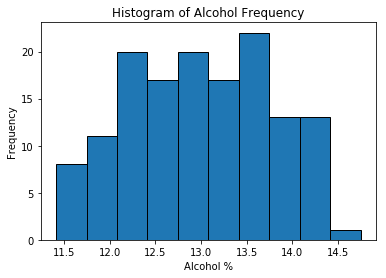

In [20]:
# visualization 1 - alcohol frequency (train)
plt.hist(train_df.alcohol, bins=10, edgecolor='black')
plt.title('Histogram of Alcohol Frequency')
plt.xlabel('Alcohol %')
plt.ylabel('Frequency')
plt.show()

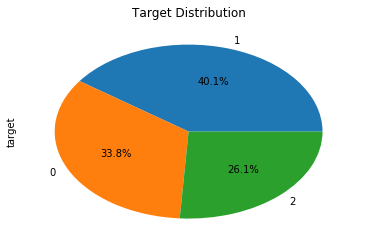

In [21]:
# visualization 2 - target distribution (train)

train_df["target"].value_counts().plot(kind='pie',autopct='%1.1f%%', title='Target Distribution' )
plt.show()

## Part 3 - Experiments
You could add as many code cells as needed

In [22]:
#seperating features and target

X_train = train_df.loc[:, train_df.columns != 'target']
y_train = train_df.loc[:,'target']
X_test = test_df.loc[:, test_df.columns != 'target']
y_test = test_df.loc[:,'target']


In [23]:
# Feature Engineering:
#  1. Standardization
#  2. MinMax Scaling
#  3. Feature selection & Dimensionality Reduction

In [24]:
# Standardization:

standard_scaler = StandardScaler()
X_train_standard_scaled = standard_scaler.fit_transform(X_train)
X_train_standard_df = pd.DataFrame(X_train_standard_scaled, columns=X_train.columns)
X_test_standard_scaled = standard_scaler.fit_transform(X_test)
X_test_standard_df= pd.DataFrame(X_test_standard_scaled, columns=X_test.columns)


In [25]:
X_train_standard_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,-1.165293,-0.429338,-0.147716,-0.275119,-1.389292,-1.123620,-0.562603,1.479415,0.144876,-1.178572,0.554869,-0.515510,-0.830216
1,0.740330,0.259077,1.163262,1.519686,0.370822,-1.202087,-1.221446,0.369703,-0.040628,1.626473,-0.998662,-1.172348,0.023858
2,-0.796872,-1.246256,-3.549173,-2.638279,-0.875925,-0.527274,-1.490973,-0.569283,-2.118278,-1.380213,0.417793,-1.144397,-0.703687
3,-1.495601,-0.530305,-1.706717,0.024015,-1.022601,0.288779,-0.422849,0.198979,-0.263233,-1.330923,-0.084820,-0.277931,-1.035826
4,0.206756,1.167784,-0.750057,0.472716,0.150808,-1.280554,-1.510938,0.711153,-0.485839,-0.461628,-1.638351,-1.340051,0.276917
5,0.143235,-1.182004,-2.344490,-1.322089,-1.609306,1.042059,1.114451,-0.740008,1.332105,0.120890,0.737638,0.756239,-0.760625
6,1.057934,-0.594557,0.844376,-0.663994,-0.435897,0.210313,0.924784,-1.081458,1.350655,0.255317,1.285943,1.021769,1.652925
7,-0.161665,2.122385,0.419194,0.622283,-1.022601,-0.966687,-1.411113,1.052603,-1.302058,1.173902,-1.912504,-1.088496,-0.371547
8,1.350129,-0.612915,-0.289443,-1.022955,1.910921,1.073446,1.104469,-0.910733,0.998197,0.277721,0.600561,1.496928,0.118755
9,-0.987435,-0.924996,-1.494126,-0.125552,-0.582573,0.069073,-0.023550,0.369703,0.961096,-1.044145,-0.450357,0.532635,-1.361640


In [26]:
X_test_standard_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0.858576,0.227324,-0.363483,0.676931,-0.545581,-1.535534,-1.262713,-0.088101,-1.008855,1.696388,-0.971026,-1.236717,-0.489916
1,1.127543,-0.677318,-0.745847,-1.162277,-0.179601,0.778149,0.453652,-1.220826,0.410431,-0.179967,0.333624,1.628400,0.887460
2,0.174953,2.262767,-0.278513,0.676931,-0.362591,-0.841429,-1.314724,1.422200,-0.231983,1.050430,-1.354747,-1.536730,-0.129175
3,-2.223332,-0.819715,-0.788332,0.523663,-0.850564,0.439995,0.287217,0.742564,0.455250,-1.256564,2.904551,0.548356,-1.172045
4,0.432712,1.190599,0.401247,0.983465,0.186379,-0.734644,-1.189898,0.062929,-0.441141,0.819730,-0.971026,-1.416725,-0.047188
5,0.040469,2.773721,-1.085727,0.523663,-0.789567,0.724756,0.786523,-0.918766,0.455250,-0.987415,-0.855910,0.893370,-1.260591
6,0.746507,-0.551673,-0.108573,-0.794436,0.308372,0.368805,0.828132,-0.012586,0.395491,-0.510636,1.062693,0.548356,0.739884
7,-0.766430,-1.255283,-1.850457,-1.530119,2.260264,-0.556668,-0.045654,-0.541191,1.575739,-0.679816,0.410368,-0.291679,-0.047188
8,-0.609533,-0.811339,-0.788332,-0.242673,3.846176,0.511185,0.391239,-0.767736,2.352611,-0.987415,0.794088,0.188341,0.566073
9,-1.405226,0.160313,2.270586,0.063861,0.247375,-0.823631,0.141586,1.346685,-0.978975,-0.526016,1.062693,-0.006667,-0.516152


In [27]:
# MinMax Scaling [0,1]:

min_max_scaler = MinMaxScaler(feature_range=(0, 1))
X_train_minmax_scaled = min_max_scaler.fit_transform(X_train)
X_train_minmax_df= pd.DataFrame(X_train_minmax_scaled, columns=X_train.columns)
X_test_minmax_scaled = min_max_scaler.fit_transform(X_test)
X_test_minmax_df= pd.DataFrame(X_test_minmax_scaled, columns=X_test.columns)


In [28]:
X_train_minmax_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0.200599,0.221996,0.513369,0.407216,0.041096,0.213793,0.244726,0.78,0.386076,0.106972,0.618557,0.361624,0.144080
1,0.649701,0.374745,0.711230,0.716495,0.369863,0.196552,0.105485,0.52,0.354430,0.704871,0.268041,0.188192,0.336662
2,0.287425,0.040733,0.000000,0.000000,0.136986,0.344828,0.048523,0.30,0.000000,0.063992,0.587629,0.195572,0.172611
3,0.122754,0.199593,0.278075,0.458763,0.109589,0.524138,0.274262,0.48,0.316456,0.074499,0.474227,0.424354,0.097718
4,0.523952,0.576375,0.422460,0.536082,0.328767,0.179310,0.044304,0.60,0.278481,0.259790,0.123711,0.143911,0.393723
5,0.508982,0.054990,0.181818,0.226804,0.000000,0.689655,0.599156,0.26,0.588608,0.383954,0.659794,0.697417,0.159772
6,0.724551,0.185336,0.663102,0.340206,0.219178,0.506897,0.559072,0.18,0.591772,0.412607,0.783505,0.767528,0.703994
7,0.437126,0.788187,0.598930,0.561856,0.109589,0.248276,0.065401,0.68,0.139241,0.608405,0.061856,0.210332,0.247504
8,0.793413,0.181263,0.491979,0.278351,0.657534,0.696552,0.597046,0.22,0.531646,0.417383,0.628866,0.892989,0.358060
9,0.242515,0.112016,0.310160,0.432990,0.191781,0.475862,0.358650,0.52,0.525316,0.135626,0.391753,0.638376,0.024251


In [29]:
X_test_minmax_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0.723684,0.367983,0.360825,0.551724,0.217391,0.000000,0.071672,0.456522,0.216028,0.696270,0.121739,0.154717,0.251046
1,0.786842,0.143451,0.268041,0.137931,0.282609,0.742857,0.634812,0.130435,0.547038,0.262877,0.417391,0.875472,0.602510
2,0.563158,0.873181,0.381443,0.551724,0.250000,0.222857,0.054608,0.891304,0.397213,0.547069,0.034783,0.079245,0.343096
3,0.000000,0.108108,0.257732,0.517241,0.163043,0.634286,0.580205,0.695652,0.557491,0.014210,1.000000,0.603774,0.076987
4,0.623684,0.607069,0.546392,0.620690,0.347826,0.257143,0.095563,0.500000,0.348432,0.493783,0.121739,0.109434,0.364017
5,0.531579,1.000000,0.185567,0.517241,0.173913,0.725714,0.744027,0.217391,0.557491,0.076377,0.147826,0.690566,0.054393
6,0.697368,0.174636,0.422680,0.220690,0.369565,0.611429,0.757679,0.478261,0.543554,0.186501,0.582609,0.603774,0.564854
7,0.342105,0.000000,0.000000,0.055172,0.717391,0.314286,0.470990,0.326087,0.818815,0.147425,0.434783,0.392453,0.364017
8,0.378947,0.110187,0.257732,0.344828,1.000000,0.657143,0.614334,0.260870,1.000000,0.076377,0.521739,0.513208,0.520502
9,0.192105,0.351351,1.000000,0.413793,0.358696,0.228571,0.532423,0.869565,0.222997,0.182948,0.582609,0.464151,0.244351


In [30]:
# Feature selection & Dimensionality Reduction
# removing highly correlated features: total phenols <-> flavanoids (0.8696)
# we will be removing total phenols since it has a lower correlation with target

X_train_reduced= X_train.loc[:, X_train.columns != 'total_phenols']
X_test_reduced= X_test.loc[:, X_test.columns != 'total_phenols']

In [31]:
X_train_reduced

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,12.08,1.83,2.32,18.5,81.0,1.50,0.52,1.64,2.400000,1.080,2.27,480.0
1,13.58,2.58,2.69,24.5,105.0,0.84,0.39,1.54,8.660000,0.740,1.80,750.0
2,12.37,0.94,1.36,10.6,88.0,0.57,0.28,0.42,1.950000,1.050,1.82,520.0
3,11.82,1.72,1.88,19.5,86.0,1.64,0.37,1.42,2.060000,0.940,2.44,415.0
4,13.16,3.57,2.15,21.0,102.0,0.55,0.43,1.30,4.000000,0.600,1.68,830.0
5,13.11,1.01,1.70,15.0,78.0,3.18,0.26,2.28,5.300000,1.120,3.18,502.0
6,13.83,1.65,2.60,17.2,94.0,2.99,0.22,2.29,5.600000,1.240,3.37,1265.0
7,12.87,4.61,2.48,21.5,86.0,0.65,0.47,0.86,7.650000,0.540,1.86,625.0
8,14.06,1.63,2.28,16.0,126.0,3.17,0.24,2.10,5.650000,1.090,3.71,780.0
9,12.22,1.29,1.94,19.0,92.0,2.04,0.39,2.08,2.700000,0.860,3.02,312.0


In [32]:
X_test_reduced

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,13.78,2.76,2.30,22.0,90.0,0.68,0.41,1.03,9.58,0.70,1.68,615.0
1,14.02,1.68,2.21,16.0,96.0,2.33,0.26,1.98,4.70,1.04,3.59,1035.0
2,13.17,5.19,2.32,22.0,93.0,0.63,0.61,1.55,7.90,0.60,1.48,725.0
3,11.03,1.51,2.20,21.5,85.0,2.17,0.52,2.01,1.90,1.71,2.87,407.0
4,13.40,3.91,2.48,23.0,102.0,0.75,0.43,1.41,7.30,0.70,1.56,750.0
5,13.05,5.80,2.13,21.5,86.0,2.65,0.30,2.01,2.60,0.73,3.10,380.0
6,13.68,1.83,2.36,17.2,104.0,2.69,0.42,1.97,3.84,1.23,2.87,990.0
7,12.33,0.99,1.95,14.8,136.0,1.85,0.35,2.76,3.40,1.06,2.31,750.0
8,12.47,1.52,2.20,19.0,162.0,2.27,0.32,3.28,2.60,1.16,2.63,937.0
9,11.76,2.68,2.92,20.0,103.0,2.03,0.60,1.05,3.80,1.23,2.50,607.0


In [33]:
# Training Section algorithms:
#-----------------------------

# 1. KNN
#    a. Standardization scaller
#    b. MinMax scaller
#    c. Selection & Dimensionality Reduction

# 2. Naive bayes
#    a. Standardization scaller
#    b. MinMax scaller
#    c. Selection & Dimensionality Reduction

# 3. Decision tree
#    a. Standardization scaller
#    b. MinMax scaller
#    c. Selection & Dimensionality Reduction

In [34]:
# 1. KNN

# KNN Imports
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#KNN function that will return the accuracy score
def train_with_knn(X_train_scaled, X_test_scaled, y_train, y_test, hyper_params):

    knn_classifier = KNeighborsClassifier(**hyper_params)
    knn_classifier.fit(X_train_scaled, y_train)
    y_pred = knn_classifier.predict(X_test_scaled)

    return accuracy_score(y_test, y_pred)


In [35]:
# Set the parameters
params = {
    'n_neighbors': 5,
    'metric': 'minkowski'
}

# Run KNN and retrun the accuracy score
# -------------------------------------

# a. KNN - Trained with standardization scaller
knn_standardization_accuracy =  train_with_knn(X_train_standard_df, X_test_standard_df, y_train, y_test, params)
print("KNN Standardization accuracy:", knn_standardization_accuracy)

# b. KNN - Trained with MinMax scaller
knn_minmax_accuracy = train_with_knn(X_train_minmax_df, X_test_minmax_df, y_train, y_test, params)
print("KNN MinMax accuracy:", knn_minmax_accuracy)

# c. KNN - Trained with Selection & Dimensionality Reduction
knn_dimensionality_reduction_accuracy = train_with_knn(X_train_reduced, X_test_reduced, y_train, y_test, params)
print("KNN Dimensionality Reduction accuracy:", knn_dimensionality_reduction_accuracy)

('KNN Standardization accuracy:', 0.97222222222222221)
('KNN MinMax accuracy:', 0.94444444444444442)
('KNN Dimensionality Reduction accuracy:', 0.69444444444444442)


In [36]:
# Pick the best scaller for KNN
print("KNN highest accuracy is:", max(knn_standardization_accuracy, knn_minmax_accuracy, knn_dimensionality_reduction_accuracy))

('KNN highest accuracy is:', 0.97222222222222221)


In [37]:
# 2. Naive bayes

# Naive bayes Imports
from sklearn.naive_bayes import GaussianNB

#Naive bayes function that will return the accuracy score
def train_with_naive_bayes(X_train_scaled, X_test_scaled, y_train, y_test):

    naive_bayes_classifier = GaussianNB()
    naive_bayes_classifier.fit(X_train_scaled, y_train)
    y_pred = naive_bayes_classifier.predict(X_test_scaled)

    return accuracy_score(y_test, y_pred)

In [38]:
# Run Naive bayes and retrun the accuracy score
# ---------------------------------------------

# a. Naive bayes - Trained with standardization scaller
naive_bayes_standardization_accuracy =  train_with_naive_bayes(X_train_standard_df, X_test_standard_df, y_train, y_test)
print("Naive bayes Standardization accuracy:", naive_bayes_standardization_accuracy)

# b. Naive bayes - Trained with MinMax scaller
naive_bayes_minmax_accuracy = train_with_naive_bayes(X_train_minmax_df, X_test_minmax_df, y_train, y_test)
print("Naive bayes MinMax accuracy:", naive_bayes_minmax_accuracy)

# c. Naive bayes - Trained with Selection & Dimensionality Reduction
naive_bayes_dimensionality_reduction_accuracy = train_with_naive_bayes(X_train_reduced, X_test_reduced, y_train, y_test)
print("Naive bayes Dimensionality Reduction accuracy:", naive_bayes_minmax_accuracy)

('Naive bayes Standardization accuracy:', 1.0)
('Naive bayes MinMax accuracy:', 1.0)
('Naive bayes Dimensionality Reduction accuracy:', 1.0)


In [39]:
# Pick the best scaller for Naive bayes
print("Naive bayes highest accuracy is:", max(naive_bayes_standardization_accuracy, naive_bayes_minmax_accuracy, naive_bayes_dimensionality_reduction_accuracy))

('Naive bayes highest accuracy is:', 1.0)


In [40]:
# 3. Decision tree

# Decision tree Imports
from sklearn.tree import DecisionTreeClassifier


# Decision tree function that will return the accuracy score
def train_with_decision_tree(X_train_scaled, X_test_scaled, y_train, y_test, hyper_params):

    decision_tree_classifier = DecisionTreeClassifier(**hyper_params)
    decision_tree_classifier = decision_tree_classifier.fit(X_train_scaled,y_train)
    y_pred = decision_tree_classifier.predict(X_test_scaled)

    return accuracy_score(y_test, y_pred)

In [41]:
# Set the parameters
params = {
    'criterion': 'entropy',
    'max_depth': 5
}

# Run Decision tree and retrun the accuracy score
# -------------------------------------

# a. Decision tree - Trained with standardization scaller
decision_tree_standardization_accuracy =  train_with_decision_tree(X_train_standard_df, X_test_standard_df, y_train, y_test, params)
print("Decision tree Standardization accuracy:", decision_tree_standardization_accuracy)

# b. Decision tree - Trained with MinMax scaller
decision_tree_minmax_accuracy = train_with_decision_tree(X_train_minmax_df, X_test_minmax_df, y_train, y_test, params)
print("Decision tree MinMax accuracy:", decision_tree_minmax_accuracy)

# c. Decision tree - Trained with Selection & Dimensionality Reduction
decision_tree_dimensionality_reduction_accuracy = train_with_decision_tree(X_train_reduced, X_test_reduced, y_train, y_test, params)
print("Decision tree Dimensionality Reduction accuracy:", decision_tree_dimensionality_reduction_accuracy)

('Decision tree Standardization accuracy:', 0.94444444444444442)
('Decision tree MinMax accuracy:', 0.91666666666666663)
('Decision tree Dimensionality Reduction accuracy:', 0.91666666666666663)


In [42]:
# Pick the best scaller for Decision tree
print("Decision tree highest accuracy is:", max(decision_tree_standardization_accuracy, decision_tree_minmax_accuracy, decision_tree_dimensionality_reduction_accuracy))

('Decision tree highest accuracy is:', 0.94444444444444442)


In [43]:

# 1. KNN

# 2. Naive bayes

# 3. Decision tree

#Imports
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score, make_scorer
from sklearn.datasets import load_iris

In [44]:
# 1. KNN

def evaluate_knn(param_grid, X_df):

    knn_classifier = KNeighborsClassifier()
    f1 = make_scorer(f1_score, average = 'weighted')

    grid = GridSearchCV(knn_classifier, param_grid, cv = 5, scoring = f1, return_train_score = False, verbose = 1)
    grid.fit(X_df, y_train)

    print("Best F1 score:", grid.best_score_)
    print("Best parameters:", grid.best_params_)

    grid_res = pd.DataFrame(grid.cv_results_)
    return grid_res, grid.best_score_, grid.best_params_


In [45]:
# Set grid parameters
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'p': [1, 2]
}

# Next, we will find the best KNN parameters using F1 score:


In [46]:
# Train set with Standard Scaler:

print("Using Standard Scaler: ")
print()

knn_grid_SS, f1_knn_SS, knn_SS_param= evaluate_knn(param_grid_knn, X_train_standard_df)


Using Standard Scaler: 
()
Fitting 5 folds for each of 24 candidates, totalling 120 fits
('Best F1 score:', 0.97831433042700666)
('Best parameters:', {'n_neighbors': 9, 'metric': 'manhattan', 'p': 1})


[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    1.2s finished


In [47]:
# Train set with MinMax Scaler:

print("Using MinMax Scaler: ")
print()

knn_grid_minmax, f1_knn_minmax, knn_MM_param= evaluate_knn(param_grid_knn, X_train_minmax_df)


Using MinMax Scaler: 
()
Fitting 5 folds for each of 24 candidates, totalling 120 fits
('Best F1 score:', 0.9712720769058798)
('Best parameters:', {'n_neighbors': 9, 'metric': 'manhattan', 'p': 1})


[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    0.9s finished


In [48]:
# Train set with Data Reduction:

print("Using Data Reduction: ")
print()

knn_grid_DR, f1_knn_DR, knn_DR_param= evaluate_knn(param_grid_knn, X_train_reduced)


Using Data Reduction: 
()
Fitting 5 folds for each of 24 candidates, totalling 120 fits
('Best F1 score:', 0.71405567491814936)
('Best parameters:', {'n_neighbors': 5, 'metric': 'manhattan', 'p': 1})


[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    0.7s finished


In [49]:
knn_max_f1= max(f1_knn_SS, f1_knn_minmax, f1_knn_DR)

knn_res = ""
if knn_max_f1==f1_knn_SS:
        knn_res = "Standard Scaler"
        knn_best_params= knn_SS_param
elif knn_max_f1==f1_knn_minmax:
        knn_res = "MinMax Scaler"
        knn_best_params= knn_MM_param
else:
        knn_res = "Data Reduction"
        knn_best_params= knn_DR_param

print()
print("Best F1 result is:", max(f1_knn_SS, f1_knn_minmax, f1_knn_DR), "with", knn_res, "and the following parameters:", knn_best_params)


()
('Best F1 result is:', 0.97831433042700666, 'with', 'Standard Scaler', 'and the following parameters:', {'n_neighbors': 9, 'metric': 'manhattan', 'p': 1})


In [50]:
# 2. Naive bayes
def evaluate_naive_bayes(X_df):

    naive_bayes_classifier = GaussianNB()
    f1 = make_scorer(f1_score, average = 'weighted')

    grid = GridSearchCV(naive_bayes_classifier, {}, cv = 5, scoring = f1, return_train_score = False, verbose = 1)
    grid.fit(X_df, y_train)

    print("Best F1 score:", grid.best_score_)

    grid_res = pd.DataFrame(grid.cv_results_)
    return grid_res, grid.best_score_

In [51]:
# Train set with Standard Scaler:

print("Using Standard Scaler: ")
print()

NB_grid_SS, f1_NB_SS=evaluate_naive_bayes(X_train_standard_df)


Using Standard Scaler: 
()
Fitting 5 folds for each of 1 candidates, totalling 5 fits
('Best F1 score:', 0.96485580147551986)


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [52]:
# Train set with MinMax Scaler:

print("Using MinMax Scaler: ")
print()

NB_grid_minmax, f1_NB_minmax= evaluate_naive_bayes(X_train_minmax_df)


Using MinMax Scaler: 
()
Fitting 5 folds for each of 1 candidates, totalling 5 fits
('Best F1 score:', 0.96485580147551986)


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [53]:
# Train set with Data Reduction:

print("Using Data Reduction: ")
print()

NB_grid_DR, f1_NB_DR= evaluate_naive_bayes(X_train_reduced)


Using Data Reduction: 
()
Fitting 5 folds for each of 1 candidates, totalling 5 fits
('Best F1 score:', 0.971830985915493)


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [54]:
NB_max_f1= max(f1_NB_SS, f1_NB_minmax, f1_NB_DR)

NB_res = ""
if NB_max_f1==f1_NB_SS:
        NB_res = "Standard Scaler"
elif NB_max_f1==f1_NB_minmax:
        NB_res = "MinMax Scaler"
else:
        NB_res = "Data Reduction"

print()
print("Best F1 result is:", max(f1_NB_SS, f1_NB_minmax, f1_NB_DR), "with", NB_res)


()
('Best F1 result is:', 0.971830985915493, 'with', 'Data Reduction')


In [55]:
# 3. Decision tree
def evaluate_decision_tree(param_grid, X_df):

    decision_tree_classifier = DecisionTreeClassifier()
    f1 = make_scorer(f1_score, average = 'weighted')

    grid = GridSearchCV(decision_tree_classifier, param_grid, cv = 5, scoring = f1, return_train_score = False, verbose = 1)
    grid.fit(X_df, y_train)

#     best_decision_tree_option = grid.best_estimator_
#     y_predict = best_decision_tree_option.predict(X_test)

    #f1_for_best_option = f1_score(y_test, y_predict, average = 'weighted')
    #print("Success rate:", grid.best_score_ * 100, "%")
    print("Best F1 score:", grid.best_score_)
    print("Best parameters:", grid.best_params_)

    grid_res = pd.DataFrame(grid.cv_results_)
    return grid_res, grid.best_score_, grid.best_params_

In [56]:
# Set grid parameters
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Next, we will find the best Decision tree parameters using F1 score

In [57]:
# Train set with Standard Scaler:

print("Using Standard Scaler: ")
print()

DT_grid_SS, f1_DT_SS, DT_SS_param= evaluate_decision_tree(param_grid_dt ,X_train_standard_df)


Using Standard Scaler: 
()
Fitting 5 folds for each of 90 candidates, totalling 450 fits
('Best F1 score:', 0.95012075479088087)
('Best parameters:', {'min_samples_split': 2, 'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1})


[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:    2.7s finished


In [58]:
# Train set with MinMax Scaler:

print("Using MinMax Scaler: ")
print()

DT_grid_minmax, f1_DT_minmax, DT_MM_param= evaluate_decision_tree(param_grid_dt, X_train_minmax_df)


Using MinMax Scaler: 
()
Fitting 5 folds for each of 90 candidates, totalling 450 fits
('Best F1 score:', 0.9571307783187758)
('Best parameters:', {'min_samples_split': 2, 'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1})


[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:    2.6s finished


In [59]:
# Train set with Data Reduction:

print("Using Data Reduction: ")
print()

DT_grid_DR, f1_DT_DR, DT_DR_param= evaluate_decision_tree(param_grid_dt, X_train_reduced)


Using Data Reduction: 
()
Fitting 5 folds for each of 90 candidates, totalling 450 fits
('Best F1 score:', 0.94349680053905405)
('Best parameters:', {'min_samples_split': 2, 'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1})


[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:    2.6s finished


In [60]:
DT_max_f1= max(f1_DT_SS, f1_DT_minmax, f1_DT_DR)

DT_res = ""
if DT_max_f1==f1_DT_SS:
        DT_res = "Standard Scaler"
        DT_best_params= DT_SS_param
elif DT_max_f1==f1_DT_minmax:
        DT_res = "MinMax Scaler"
        DT_best_params= DT_MM_param
else:
        DT_res = "Data Reduction"
        DT_best_params= DT_DR_param

print()
print("Best F1 result is:", max(f1_DT_SS, f1_DT_minmax, f1_DT_DR), "with", DT_res, "and the following parameters:", DT_best_params)


()
('Best F1 result is:', 0.9571307783187758, 'with', 'MinMax Scaler', 'and the following parameters:', {'min_samples_split': 2, 'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1})


In [61]:
# creating tables of results:

# KNN table

df_res_knn_SS= knn_grid_SS[['param_n_neighbors', 'param_p', 'param_metric', 'mean_test_score', 'std_test_score']]
SS_knn_arr= np.full(len(df_res_knn_SS.index), 'Standard Scaler')

df_res_knn_SS.insert(loc=0, column='Feature Engineering', value = SS_knn_arr)

df_res_knn_MM= knn_grid_minmax[['param_n_neighbors', 'param_p', 'param_metric', 'mean_test_score', 'std_test_score']]
MM_knn_arr= np.full(len(df_res_knn_MM.index), 'MinMax Scaler')

df_res_knn_MM.insert(loc=0, column='Feature Engineering', value = MM_knn_arr)

df_res_knn_DR= knn_grid_DR[['param_n_neighbors', 'param_p', 'param_metric', 'mean_test_score', 'std_test_score']]
DR_knn_arr= np.full(len(df_res_knn_DR.index), 'Data Reduction')

df_res_knn_DR.insert(loc=0, column='Feature Engineering', value = DR_knn_arr)

knn_frames = [df_res_knn_SS, df_res_knn_MM, df_res_knn_DR]

knn_result = pd.concat(knn_frames, ignore_index=True)

knn_result

,Feature Engineering,param_n_neighbors,param_p,param_metric,mean_test_score,std_test_score
0,Standard Scaler,3,1,euclidean,0.942468,0.047840
1,Standard Scaler,3,2,euclidean,0.942468,0.047840
2,Standard Scaler,5,1,euclidean,0.956783,0.051628
3,Standard Scaler,5,2,euclidean,0.956783,0.051628
4,Standard Scaler,7,1,euclidean,0.956837,0.051475
5,Standard Scaler,7,2,euclidean,0.956837,0.051475
6,Standard Scaler,9,1,euclidean,0.963807,0.054440
7,Standard Scaler,9,2,euclidean,0.963807,0.054440
8,Standard Scaler,3,1,manhattan,0.942396,0.053227
9,Standard Scaler,3,2,manhattan,0.942396,0.053227


In [62]:
# Naive Bayes table
# there are no useful hyperparameters

df_res_NB_SS= NB_grid_SS[['mean_test_score', 'std_test_score']]
SS_NB_arr= np.full(len(df_res_NB_SS.index), 'Standard Scaler')

df_res_NB_SS.insert(loc=0, column='Feature Engineering', value = SS_NB_arr)

df_res_NB_MM= NB_grid_minmax[['mean_test_score', 'std_test_score']]
MM_NB_arr= np.full(len(df_res_NB_MM.index), 'MinMax Scaler')

df_res_NB_MM.insert(loc=0, column='Feature Engineering', value = MM_NB_arr)

df_res_NB_DR= NB_grid_DR[['mean_test_score', 'std_test_score']]
DR_NB_arr= np.full(len(df_res_NB_DR.index), 'Data Reduction')

df_res_NB_DR.insert(loc=0, column='Feature Engineering', value = DR_NB_arr)

NB_frames = [df_res_NB_SS, df_res_NB_MM, df_res_NB_DR]

NB_result = pd.concat(NB_frames, ignore_index=True)

NB_result

,Feature Engineering,mean_test_score,std_test_score
0,Standard Scaler,0.964856,0.052694
1,MinMax Scaler,0.964856,0.052694
2,Data Reduction,0.971831,0.054428


In [63]:
# Decision Tree table

df_res_DT_SS= DT_grid_SS[['param_criterion', 'param_max_depth', 'param_min_samples_leaf', 'param_min_samples_split','mean_test_score', 'std_test_score']]
SS_DT_arr= np.full(len(df_res_DT_SS.index), 'Standard Scaler')

df_res_DT_SS.insert(loc=0, column='Feature Engineering', value = SS_DT_arr)

df_res_DT_MM= DT_grid_minmax[['param_criterion', 'param_max_depth', 'param_min_samples_leaf', 'param_min_samples_split','mean_test_score', 'std_test_score']]
MM_DT_arr= np.full(len(df_res_DT_MM.index), 'MinMax Scaler')

df_res_DT_MM.insert(loc=0, column='Feature Engineering', value = MM_DT_arr)

df_res_DT_DR= DT_grid_DR[['param_criterion', 'param_max_depth', 'param_min_samples_leaf', 'param_min_samples_split','mean_test_score', 'std_test_score']]
DR_DT_arr= np.full(len(df_res_DT_DR.index), 'Data Reduction')

df_res_DT_DR.insert(loc=0, column='Feature Engineering', value = DR_DT_arr)

DT_frames = [df_res_DT_SS, df_res_DT_MM, df_res_DT_DR]

DT_result = pd.concat(DT_frames, ignore_index=True)

DT_result

,Feature Engineering,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,mean_test_score,std_test_score
0,Standard Scaler,gini,3,1,2,0.886804,0.034145
1,Standard Scaler,gini,3,1,5,0.879440,0.030597
2,Standard Scaler,gini,3,1,10,0.886626,0.021366
3,Standard Scaler,gini,3,2,2,0.866606,0.060726
4,Standard Scaler,gini,3,2,5,0.870499,0.043908
5,Standard Scaler,gini,3,2,10,0.859797,0.055851
6,Standard Scaler,gini,3,4,2,0.849592,0.044223
7,Standard Scaler,gini,3,4,5,0.845585,0.059582
8,Standard Scaler,gini,3,4,10,0.864512,0.041877
9,Standard Scaler,gini,5,1,2,0.886610,0.046178


In [64]:
# Overall, best results are:

display(knn_result.query('mean_test_score == mean_test_score.max()'))

display(NB_result.query('mean_test_score == mean_test_score.max()'))

display(DT_result.query('mean_test_score == mean_test_score.max()'))


,Feature Engineering,param_n_neighbors,param_p,param_metric,mean_test_score,std_test_score
14,Standard Scaler,9,1,manhattan,0.978314,0.041901
15,Standard Scaler,9,2,manhattan,0.978314,0.041901
22,Standard Scaler,9,1,minkowski,0.978314,0.041901


,Feature Engineering,mean_test_score,std_test_score
2,Data Reduction,0.971831,0.054428


,Feature Engineering,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,mean_test_score,std_test_score
171,MinMax Scaler,entropy,None,1,2,0.957131,0.050727


## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [65]:
# The combination we will use is:
#  1. KNN
#  2. Standard Scaler
#  3. n-neighbors = 9
#  4. p = 1
#  5. metric = manhattan

In [66]:
# Now we will test the result against the actual information
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from numpy import mean
from numpy import absolute
from numpy import sqrt

In [67]:
# Training:
params = {
    'n_neighbors': 9,
    'p': 1,
    'metric': 'manhattan'
}

knn_classifier = KNeighborsClassifier(**params)
knn_classifier.fit(X_train_standard_df, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
           metric_params=None, n_jobs=1, n_neighbors=9, p=1,
           weights='uniform')

## Part 5 - Apply on test and show model performance estimation

In [68]:
# Predicting the result:
y_pred = knn_classifier.predict(X_test_standard_df)


In [69]:
#Printing the first classifications of the prediction
print(y_pred[:10])

[2 0 2 1 2 1 0 1 0 1]


In [70]:
# Calculating the model quality with cross validation:
cv = KFold(n_splits = 5, random_state = 1, shuffle = True)

model_quality = cross_val_score(knn_classifier, X_train_standard_df, y_train, cv = cv)

print("MAE score:", mean(absolute(model_quality)))

print("RMSE score:", sqrt(mean(absolute(model_quality))))

('MAE score:', 0.97192118226600976)
('RMSE score:', 0.98586063024446302)


In [71]:
# DataFrame with the real and the predicted values
compare_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
compare_df

,Actual,Predicted
0,2,2
1,0,0
2,2,2
3,1,1
4,2,2
5,1,1
6,0,0
7,1,1
8,1,0
9,1,1


In [72]:
print("Accuracy: ", compare_df.query("Actual==Predicted").shape[0]/compare_df.shape[0])
print("Error: ", 1-compare_df.query("Actual==Predicted").shape[0]/compare_df.shape[0])

('Accuracy: ', 0)
('Error: ', 1)
